In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
# 1. Load the dataset(first 5 rows)
data = pd.read_csv('gold_price_data.csv')
print("shape:", data.shape)
print("columns:", data.columns.tolist())
print(data.head())

shape: (5215, 7)
columns: ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']
         date       open       high        low      close  adj_close    volume
0  2004-11-18  44.380001  44.380001  44.490002  44.070000  44.430000   5992000
1  2004-11-19  44.779999  44.779999  44.919998  44.470001  44.490002  11655300
2  2004-11-22  44.950001  44.950001  44.970001  44.740002  44.750000  11996000
3  2004-11-23  44.750000  44.750000  44.919998  44.720001  44.880001   3169200
4  2004-11-24  45.049999  45.049999  45.049999  44.790001  44.930000   6105100


In [39]:
# 2. Data cleaning(missing values and duplicates)
print("Missing values:\n", data.isnull().sum())
data = data.drop_duplicates()

Missing values:
 date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64


Descriptive Statistics:

              open         high          low        close    adj_close  \
count  5215.000000  5215.000000  5215.000000  5215.000000  5215.000000   
mean    131.940968   131.940968   132.570993   131.256556   131.939183   
std      51.291094    51.291094    51.459284    51.073175    51.282084   
min      41.259998    41.259998    41.360001    41.020000    41.029999   
25%     104.730000   104.730000   105.355000   104.160000   104.754997   
50%     124.400002   124.400002   124.870003   123.980003   124.459999   
75%     164.779999   164.779999   165.489998   164.004997   164.544998   
max     316.290009   316.290009   317.630005   315.040009   317.489990   

             volume  
count  5.215000e+03  
mean   9.423568e+06  
std    6.645282e+06  
min    3.193000e+05  
25%    5.305150e+06  
50%    7.818800e+06  
75%    1.154915e+07  
max    9.380420e+07  


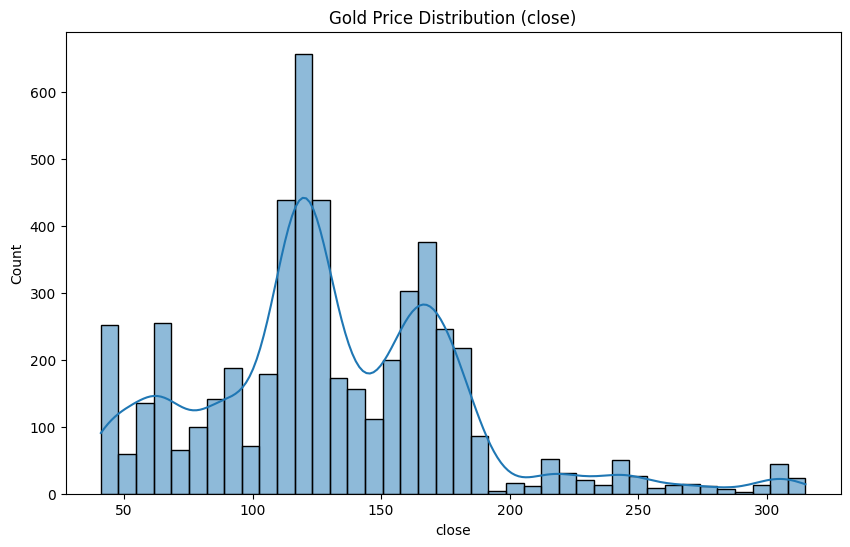

In [40]:
# 3. perform EDA
print("Descriptive Statistics:\n")
print(data.describe())
plt.figure(figsize=(10,6))
sns.histplot(data['close'], kde=True)
plt.title("Gold Price Distribution (close)")
plt.show()
             

In [41]:
# 5. Feature Engineering

data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] =  data['date'].dt.day
print(data.head())


        date       open       high        low      close  adj_close    volume  \
0 2004-11-18  44.380001  44.380001  44.490002  44.070000  44.430000   5992000   
1 2004-11-19  44.779999  44.779999  44.919998  44.470001  44.490002  11655300   
2 2004-11-22  44.950001  44.950001  44.970001  44.740002  44.750000  11996000   
3 2004-11-23  44.750000  44.750000  44.919998  44.720001  44.880001   3169200   
4 2004-11-24  45.049999  45.049999  45.049999  44.790001  44.930000   6105100   

   year  month  day  
0  2004     11   18  
1  2004     11   19  
2  2004     11   22  
3  2004     11   23  
4  2004     11   24  


In [42]:
data =  data.drop(columns=['date'])

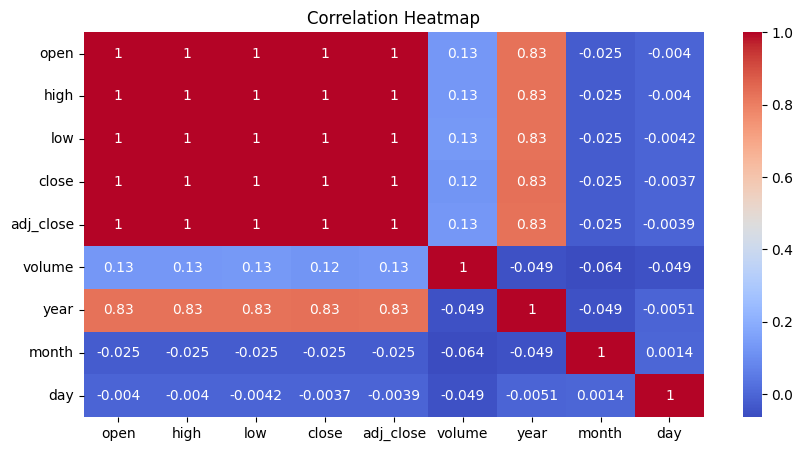

In [43]:
# 4. Correlation Heatmap
numeric_data = data.select_dtypes(include='number')
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [44]:
# 5. Select independent and target variables
y = data['close']
X = data.drop(columns=['close'])

In [45]:
# 6. Splitting Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [46]:
# 7. Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
# 8. Evaluate Model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


Mean Squared Error (MSE): 0.137
Root Mean Squared Error (RMSE): 0.370
R² Score: 1.000


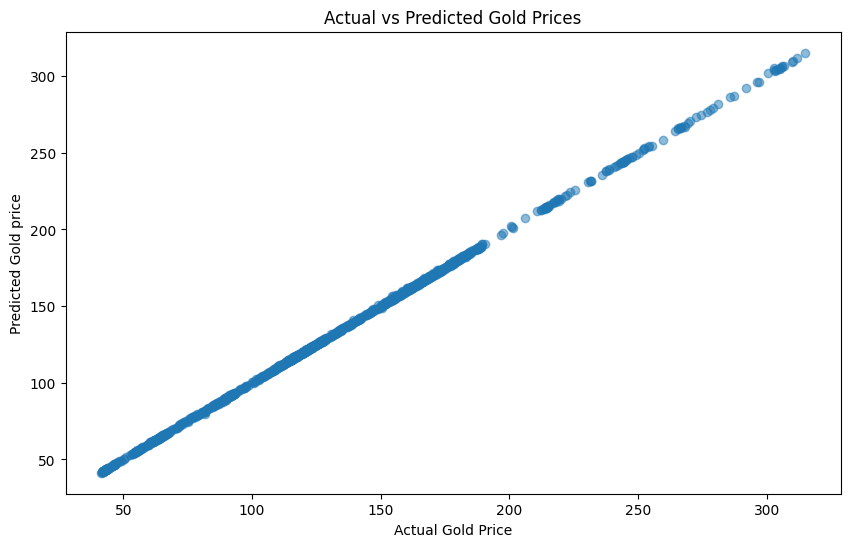

In [48]:
# 9. Plot Actual vs Predicted gold prices
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred,  alpha = 0.5)
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold price")
plt.title("Actual vs Predicted Gold Prices")
plt.show()

In [49]:
# 10. Interpet Model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients.sort_values(by='Coefficient', ascending=False))


     Feature   Coefficient
3  adj_close  6.260557e-01
1       high  3.640405e-01
0       open  3.640405e-01
5       year  1.364194e-02
6      month  1.622766e-03
7        day  3.102347e-04
4     volume -2.695578e-08
2        low -3.579947e-01
